In [1]:
import pandas as pd
df = pd.read_csv('../../data/time/passengers.csv', index_col='Month')
df

,Passengers
Month,
1949-01,112
1949-02,118
1949-03,132
1949-04,129
1949-05,121
...,...
1960-08,606
1960-09,508
1960-10,461


<AxesSubplot:xlabel='Month'>

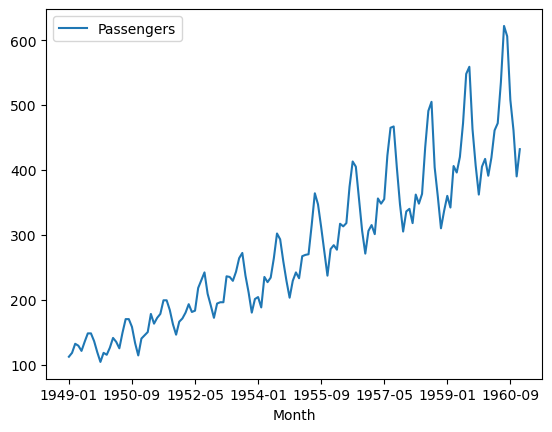

In [3]:
df.plot()

In [4]:
df = df[['Passengers']]
df.index.names = ['Month']
df.sort_index(inplace=True)
df.head()

,Passengers
Month,
1949-01,112
1949-02,118
1949-03,132
1949-04,129
1949-05,121


In [5]:
df.describe()

,Passengers
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


In [6]:
dataset = df.astype('float32')

In [7]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled = scaler.fit_transform(dataset)

In [8]:
train_size = int(len(scaled) * 0.8)
test_size = len(scaled - train_size)
train, test = scaled[0:train_size, :], scaled[train_size:len(scaled), :]
print(len(train), len(test))

115 29


In [9]:
import numpy as np
def create_dataset(dataset, timestep):
    print(len(dataset), timestep)
    dataX, dataY = [], []
    for i in range(len(dataset)-timestep-1):
        a = dataset[i:(i+timestep), 0]
        dataset[i + timestep, 0]
        dataX.append(a)
        dataY.append(dataset[i + timestep, 0])
    return np.array(dataX), np.array(dataY)

In [22]:
timestep = 2
X_train, y_train = create_dataset(train, timestep)
X_test, y_test = create_dataset(test, timestep)

115 2
29 2


In [23]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(X_train.shape)
print(X_test.shape)

(112, 2, 1)
(26, 2, 1)


In [24]:
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense
np.random.seed(0)
model=Sequential()
model.add(SimpleRNN(units=20,input_shape=(timestep,1)))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='linear'))
model.compile(loss='mse', optimizer='sgd')
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_2 (SimpleRNN)    (None, 20)                440       
                                                                 
 dense_4 (Dense)             (None, 10)                210       
                                                                 
 dense_5 (Dense)             (None, 1)                 11        
                                                                 
Total params: 661
Trainable params: 661
Non-trainable params: 0
_________________________________________________________________


In [25]:
model.fit(X_train, y_train, epochs=100)

Epoch 1/100
4/4 [==============================] - 1s 7ms/step - loss: 0.0473
Epoch 2/100
4/4 [==============================] - 0s 7ms/step - loss: 0.0211
Epoch 3/100
4/4 [==============================] - 0s 6ms/step - loss: 0.0136
Epoch 4/100
4/4 [==============================] - 0s 6ms/step - loss: 0.0116
Epoch 5/100
4/4 [==============================] - 0s 5ms/step - loss: 0.0107
Epoch 6/100
4/4 [==============================] - 0s 6ms/step - loss: 0.0100
Epoch 7/100
4/4 [==============================] - 0s 11ms/step - loss: 0.0096
Epoch 8/100
4/4 [==============================] - 0s 7ms/step - loss: 0.0092
Epoch 9/100
4/4 [==============================] - 0s 7ms/step - loss: 0.0090
Epoch 10/100
4/4 [==============================] - 0s 7ms/step - loss: 0.0086
Epoch 11/100
4/4 [==============================] - 0s 7ms/step - loss: 0.0083
Epoch 12/100
4/4 [==============================] - 0s 7ms/step - loss: 0.0080
Epoch 13/100
4/4 [==============================] - 0s 6ms/s

In [26]:
from sklearn.metrics import mean_squared_error
trainPredict = model.predict(X_train)
testPredict = model.predict(X_test)
trainPredict = scaler.inverse_transform(trainPredict)
y_train = scaler.inverse_transform([y_train])
testPredict = scaler.inverse_transform(testPredict)
y_test = scaler.inverse_transform([y_test])
trainScore = np.sqrt(mean_squared_error(y_train[0], trainPredict[:,0]))
print(trainScore)
testScore = np.sqrt(mean_squared_error(y_test[0], testPredict[:,0]))
print(testScore)

1/1 [==============================] - 0s 21ms/step
28.34537513850834
60.38594621586647


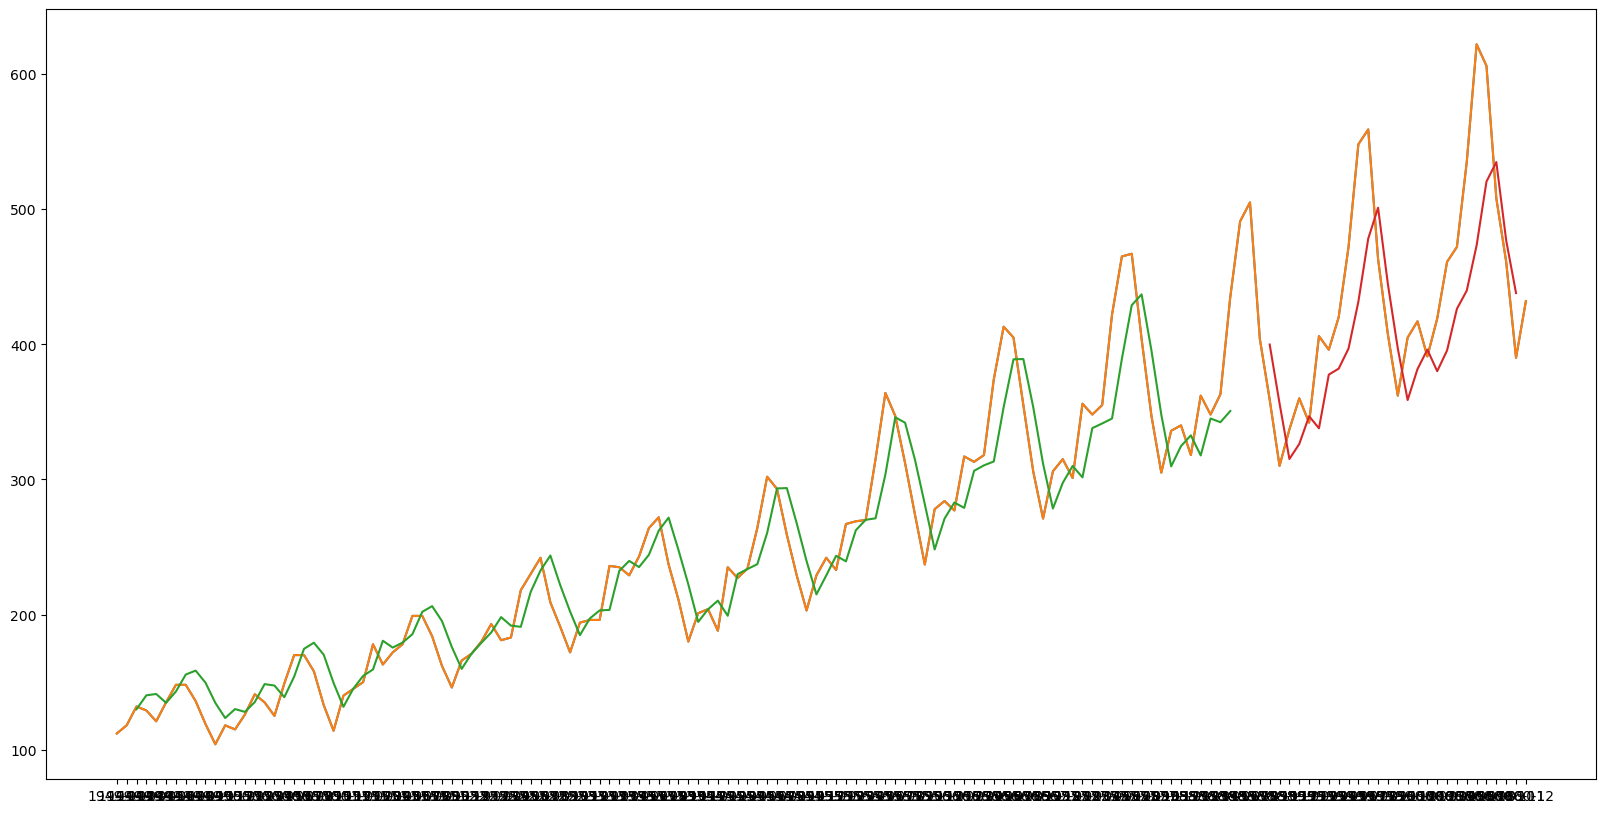

In [27]:
from matplotlib import pyplot as plt
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[timestep:len(trainPredict)+timestep, :] = trainPredict
testPredictPlot = np.empty_like(scaled)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(timestep*2)+1:len(scaled)-1, :] = testPredict
plt.figure(figsize=(20,10))
plt.plot(scaler.inverse_transform(scaled))
plt.plot(dataset)
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()
